In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns

# for data visualizations
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

# setting parameters for visualization
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
# read the dataset
data = pd.read_csv('insurance.csv')

In [3]:
# view the dataset schema
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# size of the dataset
data.shape

(1338, 7)

In [5]:
# checking for null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# summary of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# checking the skewness and kurtosis
print(data.skew())
print(data.kurt())

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64
age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64


### EDA - Univariate Analysis

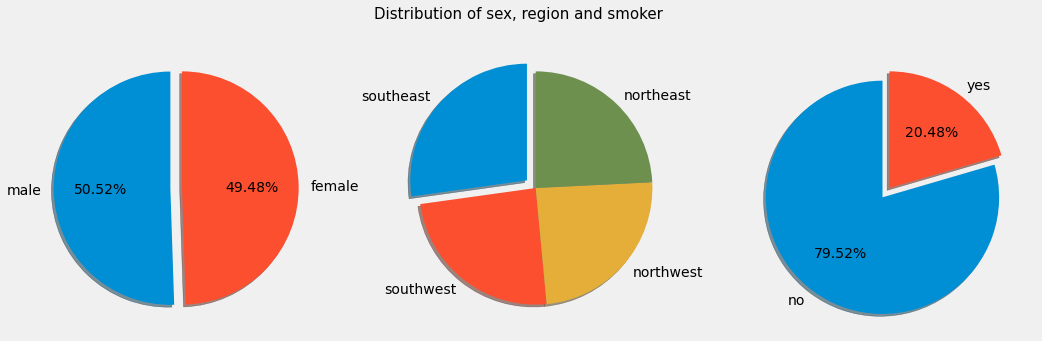

In [8]:
# check the distribution of sex, region and smoker

plt.subplot(1, 3, 1)
plt.pie(data['sex'].value_counts().values,
        labels = data['sex'].value_counts().index,
        startangle = 90,
        shadow = True,
       explode = [0.1, 0],autopct='%1.2f%%')

plt.subplot(1, 3, 2)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])

plt.subplot(1, 3, 3)
plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        startangle = 90,
        shadow = True,
       explode = [0.1, 0],autopct='%1.2f%%')

plt.suptitle('Distribution of sex, region and smoker', fontsize = 15)
plt.show()

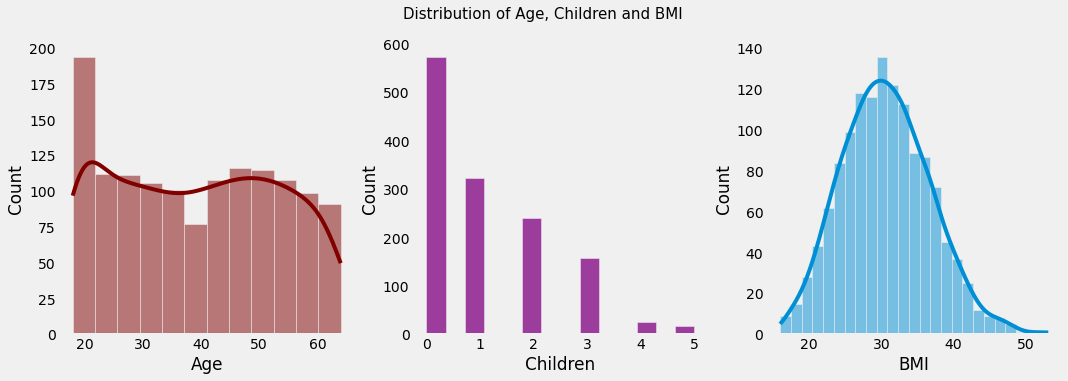

In [9]:
# check the distribution of age, children and bmi 

plt.subplot(1, 3, 1)
sns.histplot(data['age'], color = 'maroon', kde=True)
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.histplot(data['children'], color = 'purple')
plt.xlabel('Children')
plt.grid()

plt.subplot(1, 3, 3)
sns.histplot(data['bmi'], kde=True)
plt.xlabel('BMI')
plt.grid()

plt.suptitle('Distribution of Age, Children and BMI', fontsize = 15)
plt.show()

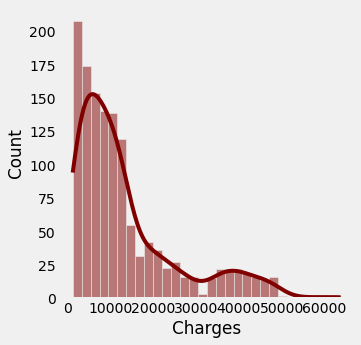

In [10]:
# check the distribution of target variable - charges 

plt.subplot(1, 3, 1)
sns.histplot(data['charges'], color = 'maroon', kde=True)
plt.xlabel('Charges')
plt.grid()

### EDA - Bivariate Analysis

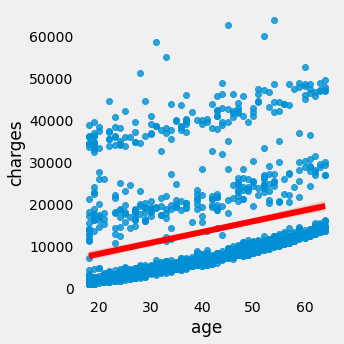

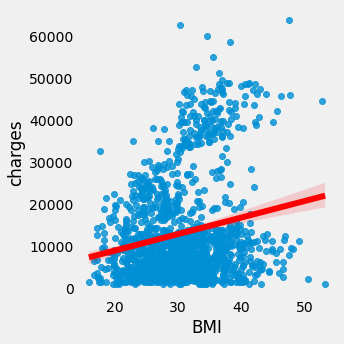

In [11]:
# understanding the impact of age on charges

sns.lmplot(data=data, x="age", y="charges", line_kws={'color': 'red'})
plt.xlabel('age')
plt.grid()

# understanding the impact of bmi on charges

sns.lmplot(data=data, x="bmi", y="charges", line_kws={'color': 'red'})
plt.xlabel('BMI')
plt.grid()

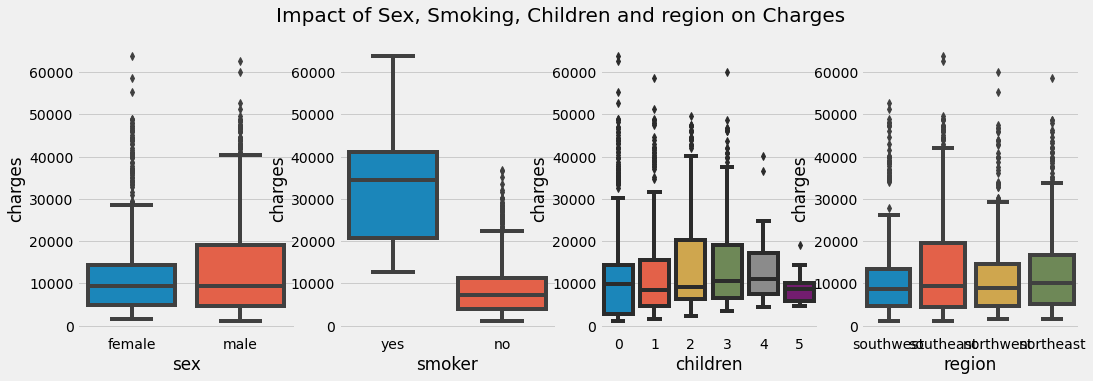

In [12]:
# understanding the impact of sex, smoking, children, region on charges

plt.subplot(1, 4, 1)
sns.boxplot(data['sex'], data['charges'])

plt.subplot(1, 4, 2)
sns.boxplot(data['smoker'], data['charges'])

plt.subplot(1, 4, 3)
sns.boxplot(data['children'], data['charges'])

plt.subplot(1, 4, 4)
sns.boxplot(data['region'], data['charges'])


plt.suptitle('Impact of Sex, Smoking, Children and region on Charges', fontsize = 20)
plt.show()

### Data Preprocessing

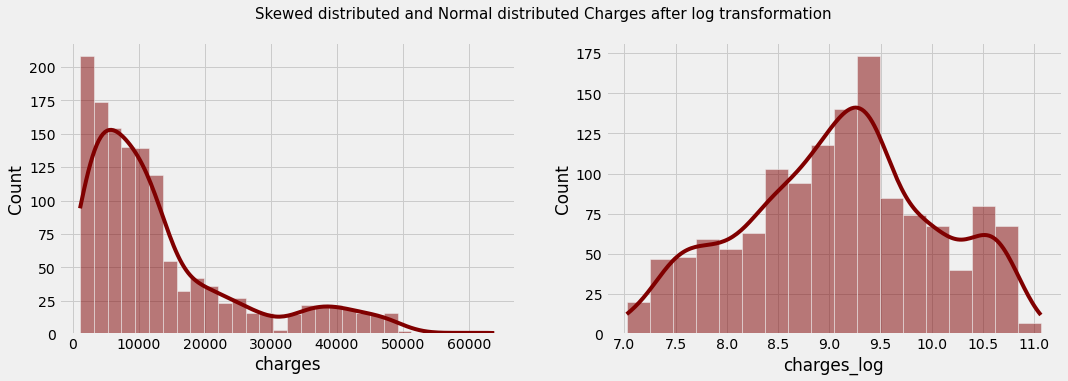

In [13]:
plt.subplot(1,2,1)
sns.histplot(data['charges'], kde=True, color = 'maroon')

# applying log transformation to normalise expenses
data['charges_log'] = np.log1p(data['charges'])
plt.subplot(1,2,2)

# checking the Distribution after log transformation
sns.histplot(data['charges_log'], kde=True, color = 'maroon')
plt.suptitle('Skewed distributed and Normal distributed Charges after log transformation',fontsize=15)
plt.show()

In [14]:
# Checking the skew and kurtosis of charges and log-transformed charges
print(data.skew())
print(data.kurt())

age            0.055673
bmi            0.284047
children       0.938380
charges        1.515880
charges_log   -0.089817
dtype: float64
age           -1.245088
bmi           -0.050732
children       0.202454
charges        1.606299
charges_log   -0.636855
dtype: float64


In [15]:
# Grouping children counts for simplicity
data['children'] = data['children'].replace((4, 5), (3, 3))

# checking the value counts
data['children'].value_counts()

0    574
1    324
2    240
3    200
Name: children, dtype: int64

In [16]:
# dropping extra column
data['charges'] = data['charges_log']
df = data.drop(['charges_log'], axis = 1)

In [17]:
# One hot encoding to transform sex and smoker
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=True)

In [18]:
# Ordinal encoder to transform region
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["region_code"] = ord_enc.fit_transform(df[["region"]]).astype('int')

In [19]:
# dropping extra columns
df['sex'] = df['sex_male']
df['smoker'] = df['smoker_yes']
df['region'] = df['region_code']

df = df.drop(['sex_male', 'smoker_yes', 'region_code'], axis=1)

In [20]:
# arranging the columns
df = df.loc[:,['age', 'sex', 'bmi','children', 'smoker', 'region', 'charges']]
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455


<AxesSubplot:>

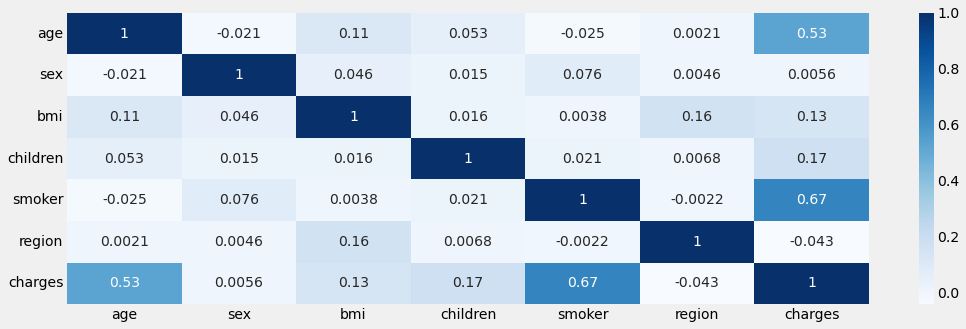

In [21]:
# Checking correlation between variables
cor = df.corr()
sns.heatmap(cor,annot=True, cmap="Blues")

In [22]:
# Defining X and Y
y = df['charges']
x = df.drop(['charges'], axis = 1)
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [23]:
# Variance Inflation Factor Testing for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

names = x.columns
inp_df = pd.DataFrame(x, columns=names)

# Defining a function to calculate VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = inp_df
calc_vif(X)

,variables,VIF
0,age,7.570629
1,sex,2.000610
2,bmi,10.402429
3,children,1.890583
4,smoker,1.257717
5,region,2.923096


In [24]:
# Splitting the data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [25]:
# Applying standard scaler to the features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

## Model Selection

### Linear regression

In [26]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)

In [27]:
# Calculating RMSE, R2 and MAE values for the model
from sklearn.metrics import r2_score, mean_squared_error

m1_mse = mean_squared_error(y_test, y_pred1)
m1_rmse = np.sqrt(m1_mse)
print("RMSE :", m1_rmse)

m1_r2_score = r2_score(y_test, y_pred1)
print("R2 Score :",m1_r2_score)

from sklearn.metrics import mean_absolute_error
m1_mae = mean_absolute_error(y_test, y_pred1)
print("MAE :", m1_mae)

print("Weights of Linear Regression model:", model1.coef_)

RMSE : 0.42220464177195854
R2 Score : 0.7876661498878194
MAE : 0.26731278099838296
Weights of Linear Regression model: [ 0.48836746 -0.0263279   0.07966437  0.11874072  0.62640737 -0.04664967]


Text(0, 0.5, 'residuals')

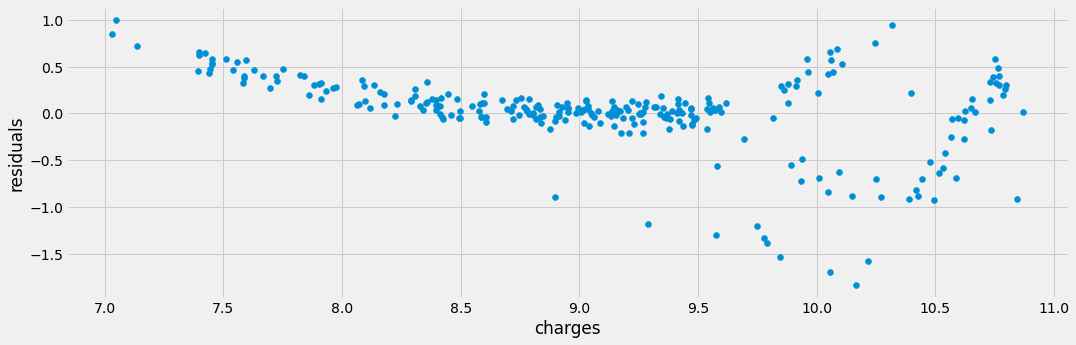

In [28]:
# Plotting the residuals
residuals = y_pred1-y_test
plt.scatter(y_test,residuals)
plt.xlabel('charges')
plt.ylabel('residuals')

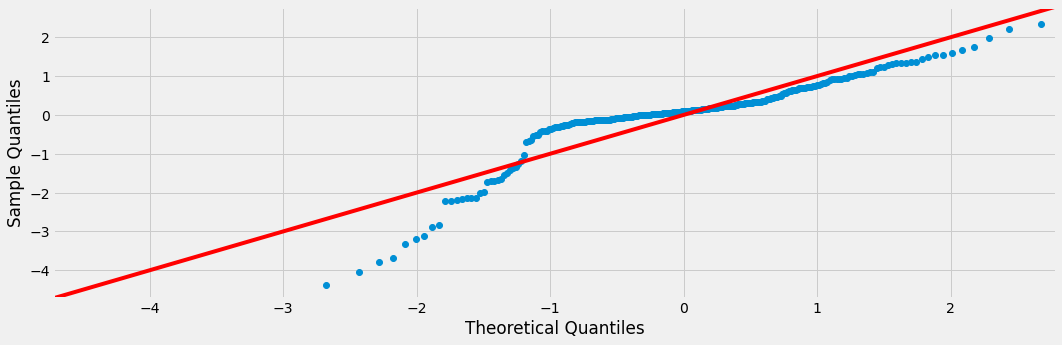

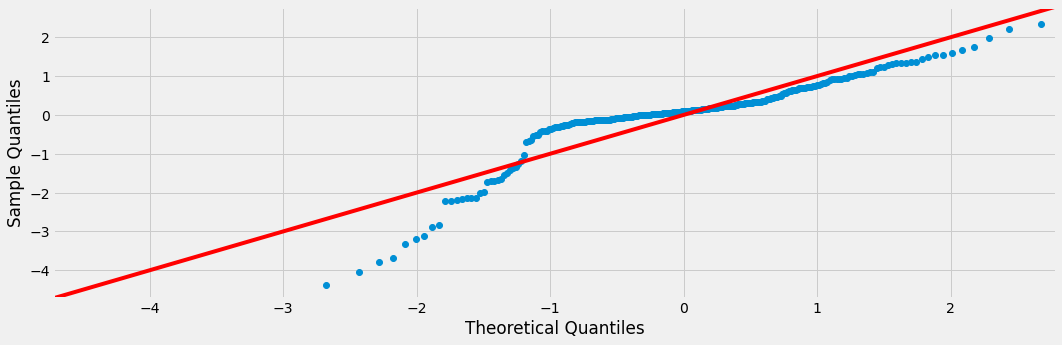

In [29]:
# Checking the normality of residuals
import statsmodels.api as sm
import scipy.stats as stats

sm.qqplot(residuals,line='45',fit=True,dist=stats.norm)

### Statsmodels OLS

In [30]:
# Using Statsmodels Ordinary least-squares (OLS) model
import statsmodels.api as sm
X1 = sm.add_constant(x_train)
result = sm.OLS(y_train, X1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     563.7
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        19:48:29   Log-Likelihood:                -663.23
No. Observations:                1070   AIC:                             1340.
Df Residuals:                    1063   BIC:                             1375.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0952      0.014    659.364      0.0

### Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

# Define parameter grid for cross-validation
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform Grid Search cross-validation to select optimal value of lambda
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Validation scores for each combination of hyperparameters:")
for mean_score, std_score, params in zip(grid_search.cv_results_['mean_test_score'], 
                                          grid_search.cv_results_['std_test_score'], 
                                          grid_search.cv_results_['params']):
    print("mean validation score: {:.6f} for params: {}".format(
        mean_score, params))
    
# Print the best value of lambda found by Grid Search    
print("Best value of lambda found by Grid Search for Ridge Regression:", grid_search.best_params_['alpha'])

Validation scores for each combination of hyperparameters:
mean validation score: 0.755507 for params: {'alpha': 0.001}
mean validation score: 0.755507 for params: {'alpha': 0.01}
mean validation score: 0.755508 for params: {'alpha': 0.1}
mean validation score: 0.755514 for params: {'alpha': 1}
mean validation score: 0.755480 for params: {'alpha': 10}
mean validation score: 0.747394 for params: {'alpha': 100}
mean validation score: 0.531169 for params: {'alpha': 1000}
Best value of lambda found by Grid Search for Ridge Regression: 1


In [32]:
from sklearn.metrics import r2_score

# Using best lambda
model2 = Ridge(alpha=1)
model2.fit(x_train, y_train)

y_pred2 = model2.predict(x_test)

# Calculate mean square error
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
print("Ridge RMSE Score :", rmse2)

# Calculate r2 score
r2_score2 = r2_score(y_test, y_pred2)
print("Ridge R2 Score :", r2_score2)
print("Weights of Ridge Regression model:", model2.coef_)

Ridge RMSE Score : 0.4221764785761785
Ridge R2 Score : 0.7876944764373246
Weights of Ridge Regression model: [ 0.48788977 -0.02627845  0.07962743  0.11868555  0.62579778 -0.04662441]


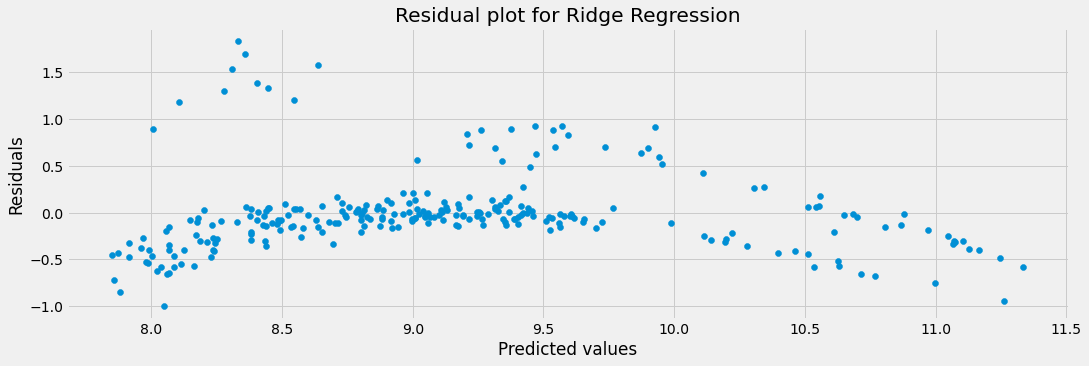

In [33]:
# Plotting residuals
residuals_ridge = y_test - y_pred2
plt.scatter(y_pred2, residuals_ridge)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot for Ridge Regression")
plt.show()

### Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

# Define parameter grid for cross-validation
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform Grid Search cross-validation to select optimal value of lambda
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Validation scores for each combination of hyperparameters:")
for mean_score, std_score, params in zip(grid_search.cv_results_['mean_test_score'], 
                                          grid_search.cv_results_['std_test_score'], 
                                          grid_search.cv_results_['params']):
    print("mean validation score: {:.6f} for params: {}".format(
        mean_score, params))
    
# Print the best value of lambda found by Grid Search    
print("Best value of lambda found by Grid Search for Lasso Regression:", grid_search.best_params_['alpha'])

Validation scores for each combination of hyperparameters:
mean validation score: 0.755507 for params: {'alpha': 0.001}
mean validation score: 0.754831 for params: {'alpha': 0.01}
mean validation score: 0.712907 for params: {'alpha': 0.1}
mean validation score: -0.010413 for params: {'alpha': 1}
mean validation score: -0.010413 for params: {'alpha': 10}
mean validation score: -0.010413 for params: {'alpha': 100}
mean validation score: -0.010413 for params: {'alpha': 1000}
Best value of lambda found by Grid Search for Lasso Regression: 0.001


In [35]:
from sklearn.metrics import r2_score

# Using best lambda
model3 = Lasso(alpha=0.001)
model3.fit(x_train, y_train)

y_pred3 = model3.predict(x_test)

# Calculate mean square error
mse3 = mean_squared_error(y_test, y_pred3) 
rmse3 = np.sqrt(mse3)
print("Lasso RMSE Score :", rmse3)

# Calculate the r2_score
r2_score3 = r2_score(y_test, y_pred3)
print("Lasso R2 Score :", r2_score3)
print("Weights of Lasso Regression model:", model3.coef_)

Lasso RMSE Score : 0.42231483618121607
Lasso R2 Score : 0.7875552981620215
Weights of Lasso Regression model: [ 0.48754907 -0.02522702  0.07855169  0.11779079  0.62535491 -0.04550025]


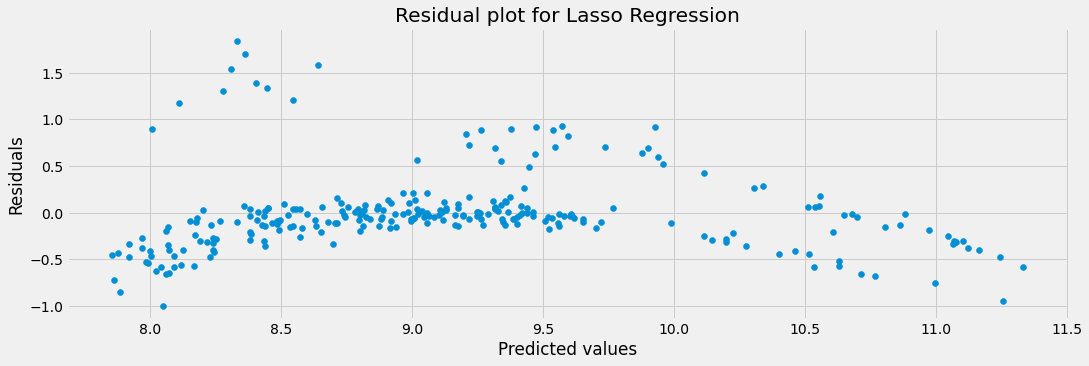

In [36]:
# Plotting residuals
residuals_lasso = y_test - y_pred3
plt.scatter(y_pred3, residuals_lasso)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot for Lasso Regression")
plt.show()

### Polynomial Regression 

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
poly_reg = PolynomialFeatures(degree=3)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.transform(x_test)

# train the polynomial regression model
model4 = LinearRegression()
model4.fit(x_poly_train, y_train)

# make predictions on the test set
y_pred_poly = model4.predict(x_poly_test)

# evaluate the model using RMSE and R^2 score
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_score_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression RMSE Score :", rmse_poly)
print("Polynomial Regression R2 Score :", r2_score_poly)

Polynomial Regression RMSE Score : 0.3294892752053201
Polynomial Regression R2 Score : 0.8706829487100145


In [38]:
residuals_poly = y_test - y_pred_poly

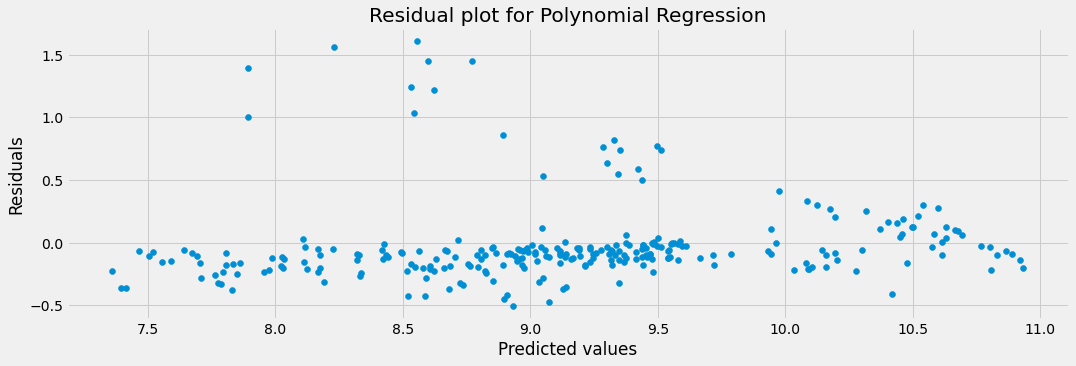

In [39]:
# Plotting residuals
plt.scatter(y_pred_poly, residuals_poly)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual plot for Polynomial Regression")
plt.show()

## Model comparison

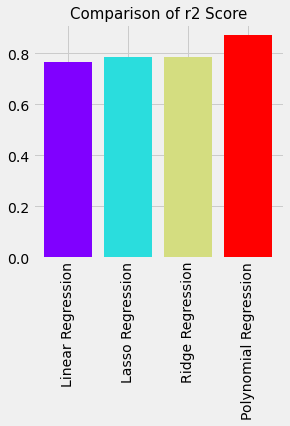

In [40]:
# Plotting the R2 scores of the various models

r2_score = np.array([0.766, 0.787, 0.787, 0.87])
labels = np.array(['Linear Regression','Lasso Regression','Ridge Regression','Polynomial Regression'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), r2_score[index], color = color)
plt.xticks(range(0, 4), ['Linear Regression', 'Lasso Regression','Ridge Regression','Polynomial Regression'], rotation = 90)
plt.title('Comparison of r2 Score', fontsize = 15)
plt.show()

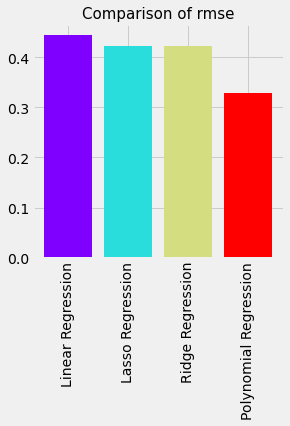

In [41]:
rmse_score = np.array([0.444, 0.422, 0.422,0.3294])
labels = np.array(['Linear Regression','Lasso Regression','Ridge Regression','Polynomial Regression'])
index = range(0, 4)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4, 4)

plt.bar(range(len(index)), rmse_score[index], color = color)
plt.xticks(range(0, 4), ['Linear Regression','Lasso Regression','Ridge Regression','Polynomial Regression'], rotation = 90)
plt.title('Comparison of rmse', fontsize = 15)
plt.show()

# THE END